In [22]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
import pandas as pd
import sys
import datetime
from operator import methodcaller

In [2]:
def stockchart(symbol,interval):
    ts = TimeSeries(key='XCMSFDTYUZGLCJBS', output_format='pandas')
    data, meta_data = ts.get_intraday(symbol=symbol,interval=interval, outputsize='full')
    data.index = pd.to_datetime(data.index)
    data_length = len(data)
    bounds = []
    for v in range(data_length-1):
        if data.index[v].date()!=data.index[v+1].date():
            bounds = bounds + [v]
    data['timestamp']=data.index
    data.index=range(data_length)
    
    
    plt.figure(figsize=(17,7))
    plt.plot(data['4. close'],label = symbol,color='C3')
    plt.title(symbol + ' Stock Price (' + interval + ')')
    plt.xlabel('Time')
    plt.ylabel(symbol + ' Stock Price')
#    plt.legend()
    for i in bounds:
        plt.axvline(x=i,ls='--',color='C1')
    plt.show()

In [43]:
symbol = 'AMZN'
interval = '15min'
past_days = 10

In [33]:
ts = TimeSeries(key='XCMSFDTYUZGLCJBS', output_format='pandas')
data, meta_data = ts.get_intraday(symbol=symbol,interval=interval, outputsize='full')
data.index = pd.to_datetime(data.index)
data_length = len(data)
bounds = []
for v in range(data_length-1):
    if data.index[v].date()!=data.index[v+1].date():
        bounds = bounds + [v]
data['timestamp']=data.index
data.index=range(data_length)


In [34]:
data['date']=data['timestamp'].map(methodcaller('strftime', '%Y-%m-%d, %H:%M:%S'))

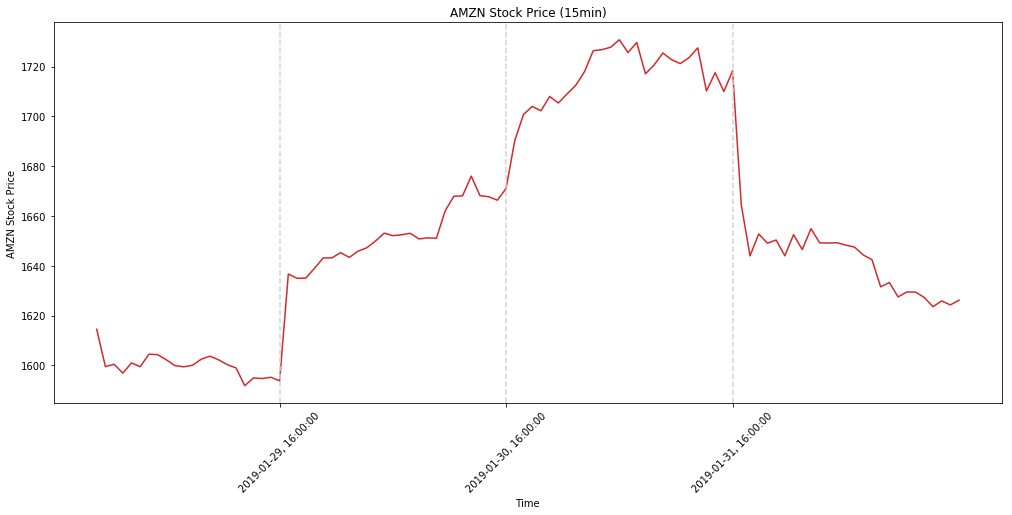

In [35]:
data.index = data['date']
plt.figure(figsize=(17,7))
plt.plot(data['4. close'],label = symbol,color='C3')
plt.title(symbol + ' Stock Price (' + interval + ')')
plt.xlabel('Time')
plt.ylabel(symbol + ' Stock Price')
#plt.legend()
plt.xticks(bounds,rotation=45)
for i in bounds:
    plt.axvline(x=i,ls='--',color='lightgrey')
plt.show()

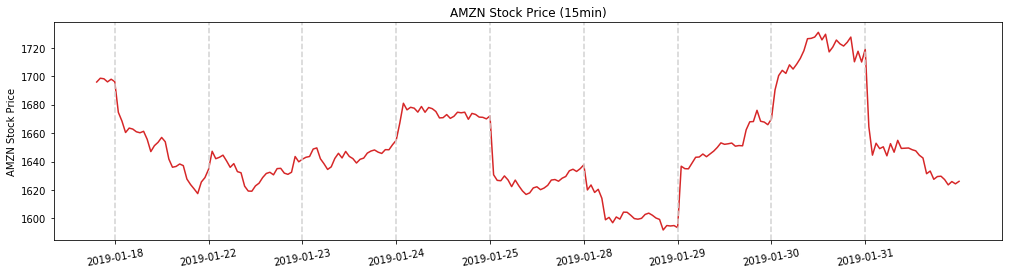

In [59]:
ts = TimeSeries(key='XCMSFDTYUZGLCJBS', output_format='pandas')
data, meta_data = ts.get_intraday(symbol=symbol,interval=interval, outputsize='full')
data.index = pd.to_datetime(data.index)
data_length = len(data)
data = data[data_length-past_days*24:]
data_length = len(data)
bounds = []
for v in range(data_length-1):
    if data.index[v].date()!=data.index[v+1].date():
        bounds = bounds + [v]
data['timestamp']=data.index
data.index=range(data_length)

    
data['new_index'] = range(data_length)
data['new_index'] = data['new_index'].apply(str)
for i in bounds:
    data.loc[i,'new_index'] = data['timestamp'][i].strftime('%Y-%m-%d')
data.index = data['new_index']
#data['date']=data['timestamp'].map(methodcaller('strftime', '%Y-%m-%d, %H:%M:%S'))

plt.figure(figsize=(17,4))
plt.plot(data['4. close'],label = symbol,color='C3')
plt.title(symbol + ' Stock Price (' + interval + ')')
#plt.xlabel('Time')
plt.ylabel(symbol + ' Stock Price')
plt.xticks(bounds)
#plt.legend()
for i in bounds:
    plt.axvline(x=i,ls='--',color='lightgrey')
plt.show()

In [53]:
data['new_index'] = range(data_length)
data['new_index'] = data['new_index'].apply(str)
for i in bounds:
    data['new_index'][i] = data['timestamp'][i].strftime('%Y-%m-%d')

C:\Users\ZheMin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [58]:
data

,1. open,2. high,3. low,4. close,5. volume,timestamp,new_index
0,1698.1000,1699.7893,1694.2084,1695.9000,220158.0,2019-01-18 14:45:00,0
1,1695.7717,1699.0300,1694.6901,1698.5800,151013.0,2019-01-18 15:00:00,1
2,1698.8800,1699.0000,1696.1292,1698.1899,129912.0,2019-01-18 15:15:00,2
3,1698.2450,1698.8562,1696.0000,1696.0100,114057.0,2019-01-18 15:30:00,3
4,1696.3800,1697.8700,1695.6238,1697.8700,146032.0,2019-01-18 15:45:00,4
5,1698.0000,1698.0800,1691.5400,1696.2000,474637.0,2019-01-18 16:00:00,5
6,1681.0000,1681.3490,1673.0000,1674.6125,609228.0,2019-01-22 09:45:00,6
7,1674.1801,1674.1801,1663.5000,1668.4399,412901.0,2019-01-22 10:00:00,7
8,1668.0000,1668.1600,1656.0157,1660.4009,291454.0,2019-01-22 10:15:00,8
9,1659.9000,1667.9900,1658.3101,1663.5200,233860.0,2019-01-22 10:30:00,9


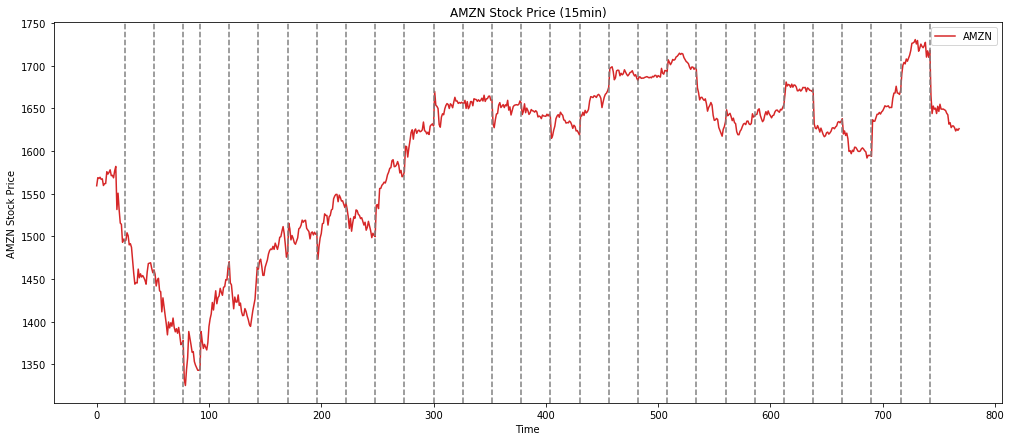

In [81]:
stockchart(symbol,interval)

In [177]:
intervalSMA = 'daily'
time_period = 100
series_type = 'close'
past_days = 200

In [191]:
def movingaverage_chart(symbol,interval,time_period,series_type,past_days):
    #Base historical stock data
    ts = TimeSeries(key='4R5NDTM0D1HKQA9V', output_format='pandas')
    data_price, meta_data_price = ts.get_daily_adjusted(symbol=symbol, outputsize='full')
    data_price_length=len(data_price)
    data_price = data_price[data_price_length-past_days:]
    
    
    ti = TechIndicators(key='MY2FVAV6O66MO17X', output_format='pandas')
    
    #SMA data
    data_SMA, meta_data_SMA = ti.get_sma(symbol=symbol,interval=intervalSMA,
                             time_period=time_period,series_type=series_type)
    t_SMA=data_SMA.index==data_price.index[0]
    start_SMA = [i for i, x in enumerate(t_SMA) if x]
    
    
    #EMA data
    #data_EMA, meta_data_EMA = ti.get_ema(symbol=symbol,interval=intervalSMA,
    #                         time_period=time_period,series_type=series_type)
    #t_EMA=data_EMA.index==data_price.index[0]
    #start_EMA = [i for i, x in enumerate(t_EMA) if x]
    
    
    #Plotting
    data_price_length=len(data_price)
    plt.figure(figsize=(17,4))
    plt.plot(data_price['4. close'],label = 'actual price',color='C3')
    plt.plot(data_SMA['SMA'][start_SMA[0]:],label = 'SMA',color='C2')
    #plt.plot(data_EMA['EMA'][start_EMA[0]:],label = 'EMA',color='C1')
    plt.xlabel('Date')
    plt.xticks(range(0,data_price_length,10),rotation=45)
    for i in range(0,data_price_length,10):
        plt.axvline(x=i,ls='--',color='lightgrey')
    plt.ylabel(symbol + ' Stock Price')
    plt.legend()
    plt.show()
    

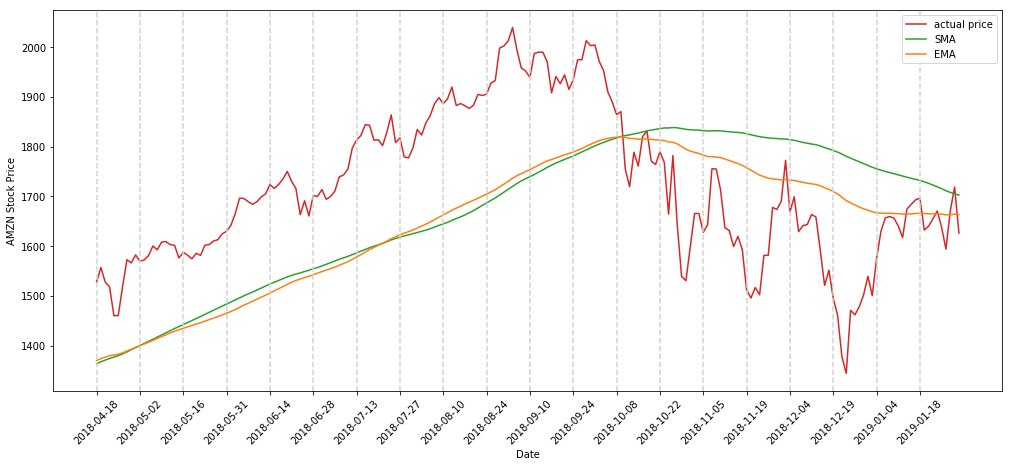

In [186]:
movingaverage_chart(symbol,intervalSMA,time_period,series_type,past_days)

In [188]:
symbols = ['AMZN', 'NFLX', 'JD', 'SBUX', 'TSLA', 'BABA', 'SPOT']

In [189]:
interval = '15min'
intervalSMA = 'daily'
time_period = 100
series_type = 'close'
past_days = 200

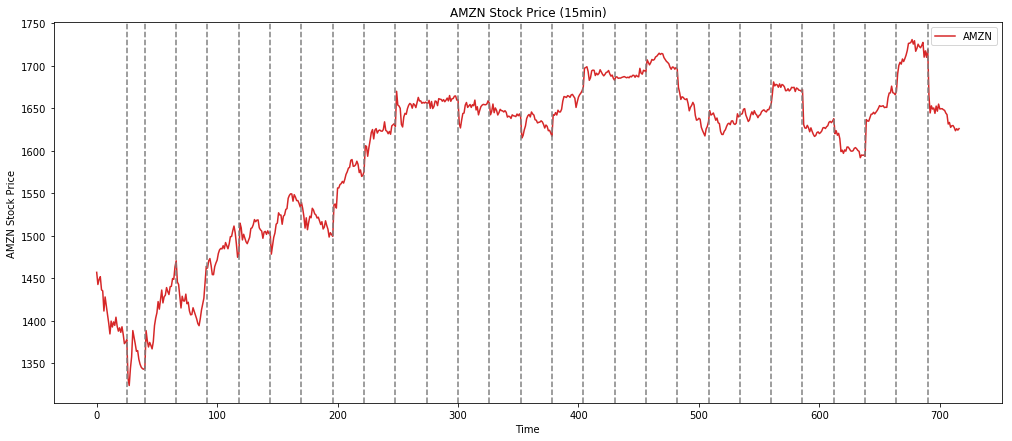

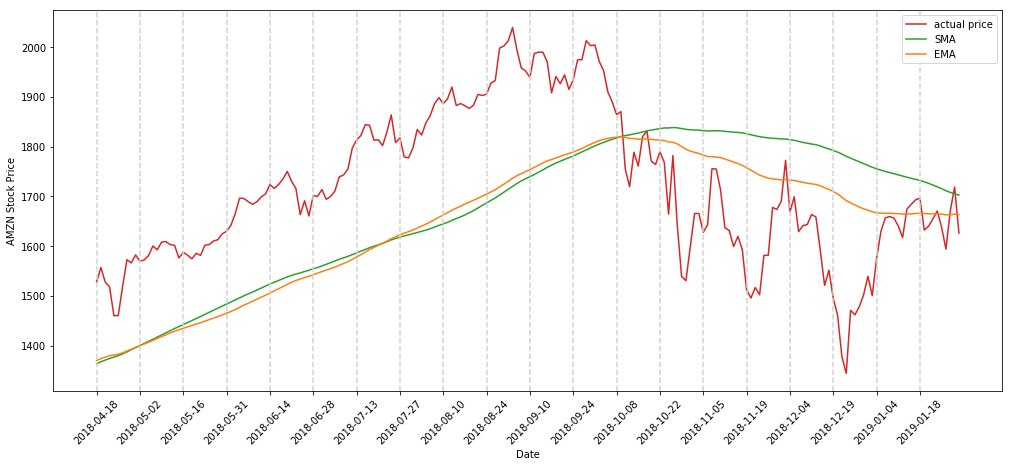

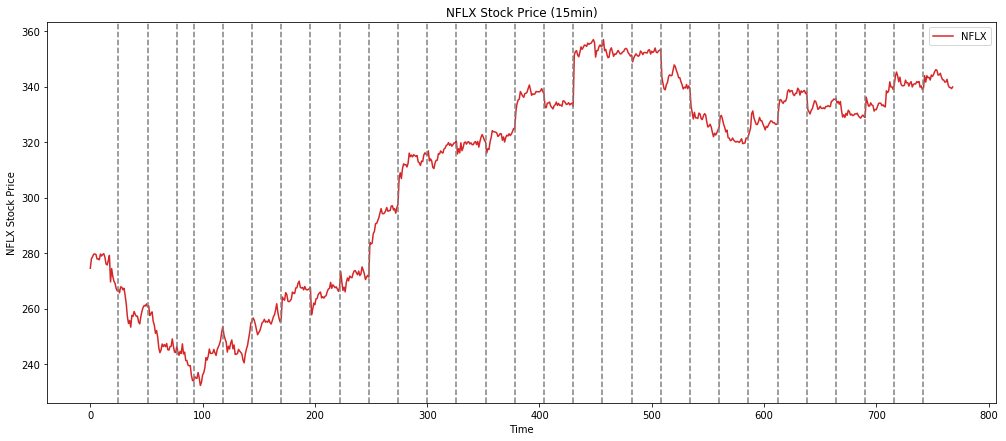

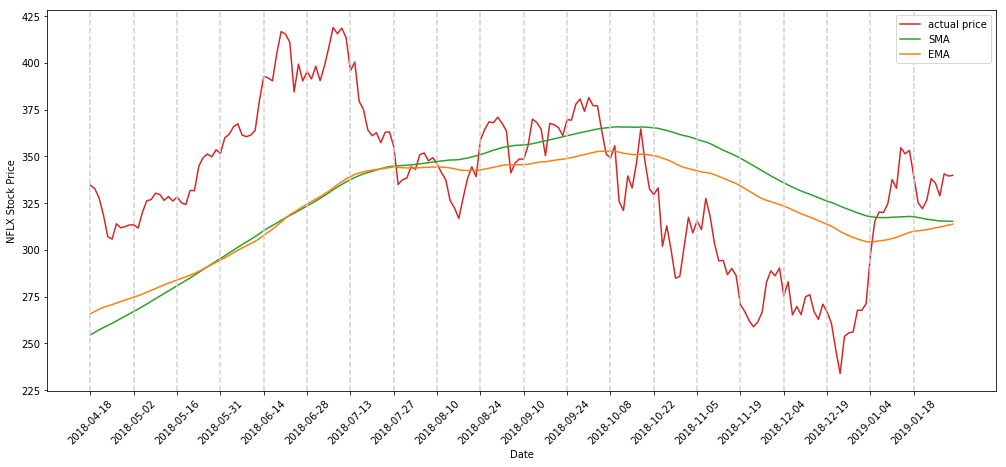

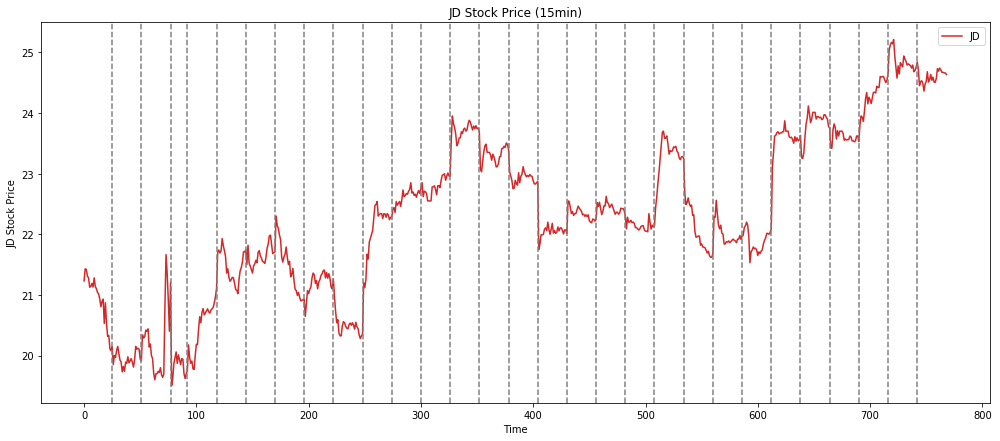

KeyError: 'Technical Analysis: SMA'

In [192]:
for sym in symbols:
    stockchart(sym,interval)
    movingaverage_chart(sym,intervalSMA,time_period,series_type,past_days)